1
Midpoint grid integral time 2.946254014968872
Midpoint grid integral abs error 0.0036041771201436035
Monte carlo integral time 2.687847137451172
Monte carlo abs error 0.014938596370631885
Prob that monte carlo is better 0.39


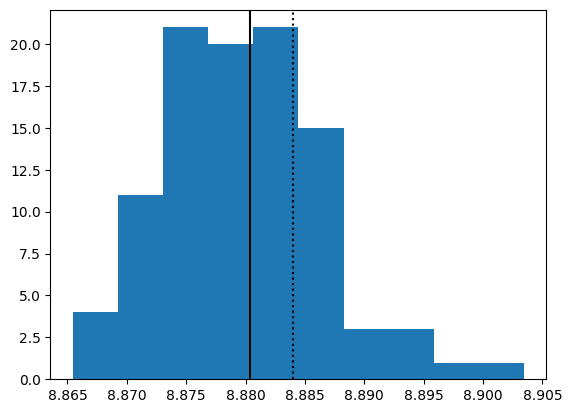

2
Midpoint grid integral time 2.23223876953125
Midpoint grid integral abs error 0.001439999561048566
Monte carlo integral time 1.7399375438690186
Monte carlo abs error 0.008293200512193621
Prob that monte carlo is better 0.3


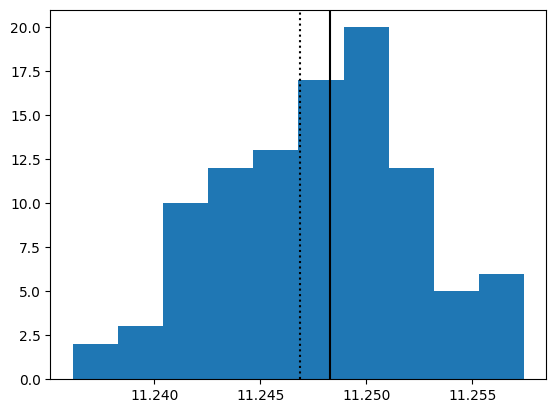

3
Midpoint grid integral time 2.502352714538574
Midpoint grid integral abs error 0.006480783145782709
Monte carlo integral time 1.7695941925048828
Monte carlo abs error 0.0004058777502748967
Prob that monte carlo is better 0.52


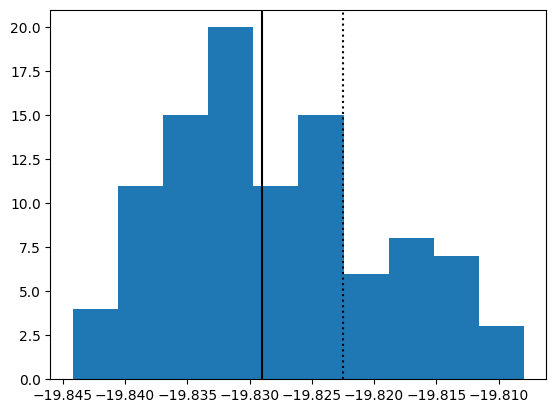

4
Midpoint grid integral time 2.0878028869628906
Midpoint grid integral abs error 0.002312182995982681
Monte carlo integral time 1.6460728645324707
Monte carlo abs error 0.003489971545032944
Prob that monte carlo is better 0.45


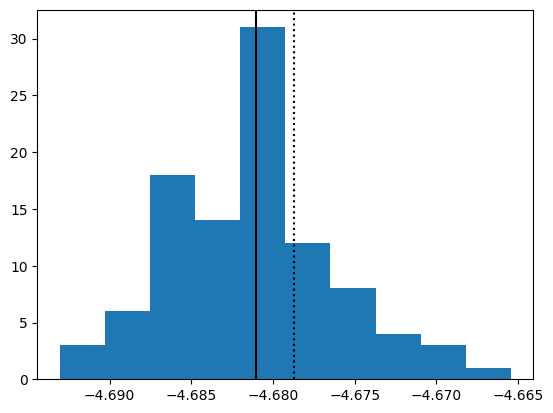

5
Midpoint grid integral time 2.4784140586853027
Midpoint grid integral abs error 0.003931394436619939
Monte carlo integral time 1.7751152515411377
Monte carlo abs error 0.0018845883819835763
Prob that monte carlo is better 0.52


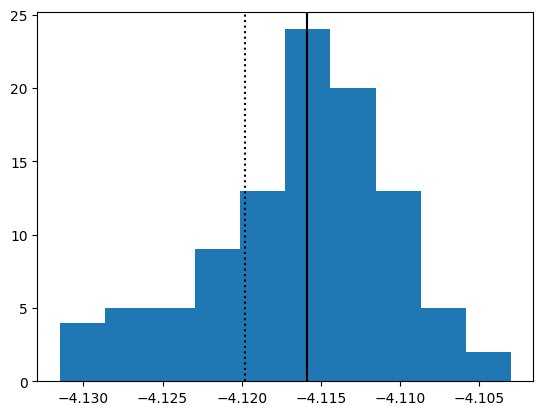

In [1]:
# Grid midpoint vs Monte carlo

import time
import matplotlib.pyplot as plt
from monte_carlo import single_variable_polynomial, polynomial_grid_midpoint_integral, polynomial_monte_carlo_integral, polynomial_integral
import random

x0 = single_variable_polynomial(0)
x1 = single_variable_polynomial(1)
x2 = single_variable_polynomial(2)
x3 = single_variable_polynomial(3)
x4 = single_variable_polynomial(4)

for i in range(5):
    print(i + 1)
    polynomial = 0
    for i in range(3):
        for j in range(3):
            for k in range(3):
                for l in range(3):
                    for m in range(3):
                        coefficient = 20 * random.random() - 10
                        polynomial += coefficient * x0 ** i * x1 ** j * x2 ** k * x3 ** l * x4 ** m
    region = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

    grid_n = 20
    monte_carlo_n = grid_n ** len(region)

    actual_integral = polynomial_integral(polynomial, region)

    start = time.time()
    grid_midpoint_estimate = polynomial_grid_midpoint_integral(polynomial, region, grid_n)
    print('Midpoint grid integral time', time.time() - start)
    print('Midpoint grid integral abs error', abs(grid_midpoint_estimate - actual_integral))

    start = time.time()
    monte_carlo_estimate = polynomial_monte_carlo_integral(polynomial, region, monte_carlo_n)
    print('Monte carlo integral time', time.time() - start)
    print('Monte carlo abs error', abs(monte_carlo_estimate - actual_integral))

    N = 100
    monte_better_count = 0
    monte_carlo_integrals = []
    for c in range(N):
        monte_carlo_estimate = polynomial_monte_carlo_integral(polynomial, region, monte_carlo_n)
        monte_carlo_integrals.append(monte_carlo_estimate)
        if abs(monte_carlo_estimate - actual_integral) < abs(grid_midpoint_estimate - actual_integral):
            monte_better_count += 1
    print('Prob that monte carlo is better', monte_better_count / N)

    plt.hist(monte_carlo_integrals)
    plt.axvline(x = actual_integral, color = "black")
    plt.axvline(x = grid_midpoint_estimate, color = "black", linestyle=":")
    plt.show()